# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Optimización

Podemos definir un *problema de optimización* como el problema de encontrar el "mejor" elemento dentro de un posible conjunto (o dominio) en base a un criterio de cual elemento es mejor que otro. Un ejemplo muy común en muchas disciplinas es el encontrar los parámetros de una función que mejor "ajustan" un resultado experimental. 

Para ser más estrictos, dada una función $f(x,\{p_i\})$ donde $x \in \mathbb R$ y $\{p_i\}$ es un conjunto de parámetros, dada una muestra que consiste en un conjunto de $N$ pares ordenados $(x_j,y_j)$. El "mejor" conjunto de parámetros $\{p_i\}_{\mathrm{best}}$ es aquel que minimiza la función

$$ E(\{p_i\}) = \frac{1}{N} \sum_{j=1}^N (f(x_j,\{p_i\})-y_j)^2. $$

Este problema de optimización en particular se conoce como *problema de mínimos cuadrados* porque optimiza el conjunto de parámetros para minimizar la desviación cuadrática media de la función $f$ sobre el espacio de parámetros posibles. El caso más simple que se puede plantear es el "ajuste de una recta" a un conjunto de puntos.

En este *notebook* se utilizan rutinas de optimización del paquete *SciPy* para encontrar el mejor polinomio de grado cinco que ajusta un conjunto de datos.

Como siempre, cargamos los paquetes que utilizaremos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Nuestra función $f(x,\{p_i\})$ será un polinomio de grado tres que definimos de la forma $f(x)=a(x-x_1)(x-x_2)^2(x-x_3)^2$, pasamos los parámetros $(a,x_1,x_2,x_3)$ en un vector `p`:

In [2]:
def mif(x,p):
    x_1 = p[0]
    x_2 = p[1]
    x_3 = p[2]
    a = p[3]
    return a*(x-x_1)*(x-x_2)**2*(x-x_3)**2

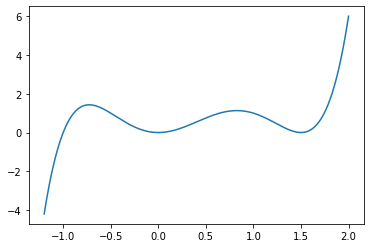

In [3]:
plt.plot(np.linspace(-1.2,2,1000),mif(np.linspace(-1.2,2,1000),[-1.0,0,1.5,2.0]))

En vez de utilizar un conjunto de datos "experimentales" vamos a generarlo de forma aleatoria. Para ello utilizaremos algunas funciones del generador de números aleatorios incluido en el paquete *NumPy*.  Estrictamente `Python` siempre devolverá una secuencia de números *pseudoaleatorios*. El generador es estrictamente determinista. Los números pseudoaleatorios son utilizados en muchos campos de la física computacional y la estadística y conviene estar mínimamente familiarizados con su uso. Lo primero que hacemos es "sembrar" el generador con un número, de esta forma, cada vez que se llamen rutinas de generación de números aleatorios obtendremos la misma secuencia y este notebook será reproducible. 

In [4]:
np.random.seed(31415)

En la siguiente celda generamos el conjunto de $N$ pares ordenados $(x_j,y_j)$. La forma en que los generamos es:

- Primero muestremos en forma aleatoria el intervalo $[x_{\mathrm lb},x_{\mathrm ub})$ generando $N$ números aleatorios con una distribución uniforme en el intervalo $[0,1)$ y los escaleamos multiplicando por $(x_{\mathrm ub}-x_{\mathrm lb})$ y los "corremos" sumando $x_{\mathrm lb}$.
- Luego evaluamos $f(x_j,\mathbf{p})$ y sumamos a ese resultado un número aleatorio obtenido de una distribución Gaussiana de $\sigma = 1$ y multiplicado por el valor deeseado de $\sigma$.

De esta forma generamos un conjunto de pares ordenados uniformemente en las abscisa y para cada ordenada agregamos un "ruido" Gaussiano. 

Esta es una de muchas formas de obtener una distribución de prueba para "jugar" con nuestro problema de optimización.

In [5]:
N = 5000
x_ub = -1.2
x_lb = 2
sigma = 1.0
p = np.array([-1.0,0,1.5,2.0])

x_data = np.random.rand((N)) * (x_ub - x_lb) + x_lb
y_data = np.zeros_like(x_data)

for j in range(0,N):
    y_data[j] = mif(x_data[j],p) + np.random.standard_normal() * sigma

Aquí dibujamos la función y nuestra muestra de evaluaciones:

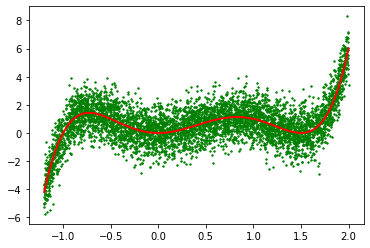

In [6]:
plt.scatter(x_data,y_data,marker='o',s=2.0,color='green')
plt.plot(np.linspace(x_lb,x_ub,1000),mif(np.linspace(x_lb,x_ub,1000),p),color='red',linewidth='2.0')

Aquí definimos nuestra **función objetivo** como la media de las desviaciones cuadráticas para cada punto de la muestra:

In [7]:
def objective(params):
    objective = 0.0
    for i in range(0,N):
        objective += (mif(x_data[i],params) - y_data[i])**2
    return objective

Aquí llamamos la rutina `optimize` para encontrar un vector $\mathbf{p}$ que minimice $E(\mathbf{p})$. Los siguientes parátros son:

- nuestra función objetivo `objective`.
- un vector inicial de prueba a partir del cual se comenzará la optimización `params0`
- un método a utilizar, en este caso el algoritmo *SIMPLEX* o de *Nelder-Mead* (para ver una lista completa de los métodos disponibles consultar la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
- por último pasamos una diccionario conteniendo una serie de parámetros que son específicos para cada método de optimización, en este caso un número máximo de iteraciones y el booleano `disp` que escribe al finalizar una serie de datos sobree el proceso

In [8]:
params0 = np.array([0.0,0.0,0.0,0.5])
res = opt.minimize(objective, params0, method='nelder-mead'
                   ,options={'disp': True, 'maxiter' : 1000})

Optimization terminated successfully.
         Current function value: 4704.919505
         Iterations: 504
         Function evaluations: 839


El resultado final de la optimización se encuentra en el vector `x` que es una propiedad del objeto almacenado en `res`:

In [9]:
res.x

array([-9.98932986e-01,  1.49687635e+00, -1.78046802e-04,  2.04565523e+00])

Podemos observar también el valor de la función objetivo en el conjunto de parámetros iniciales, en el final y en los que utilizamos para generar la muestra:

In [10]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array(p)))

Valor inicial =  50423.715433097466
Valor final =  4704.919505063399
Valor con nuestra función =  4712.864786884872


**Preguntas:**:

- ¿Encontró la rutina el mínimo de la función objetivo?
- ¿Porqué los valores encontrados para los parámetros no son los mismos que los que utilizamos para generar la muestra?
- ¿La función objetivo tiene un único mínimo?

Para ayudar a responder podemos empezar desde otro lugar distinto:

In [11]:
params0 = np.array([-0.9,2.3,1.2,2.5])
res = opt.minimize(objective, params0, method='nelder-mead'
                   ,options={'disp': True, 'maxiter' : 1000})

Optimization terminated successfully.
         Current function value: 4704.919458
         Iterations: 201
         Function evaluations: 343


In [12]:
res.x

array([-9.98936227e-01, -1.70555492e-04,  1.49687749e+00,  2.04549656e+00])

In [13]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array(p)))

Valor inicial =  908229.9822046434
Valor final =  4704.91945772133
Valor con nuestra función =  4712.864786884872


¿Este resultado modifica sus respuestas anteriores?

Comparemos gráficamente el resultado obtenido de la optimización con el "real":

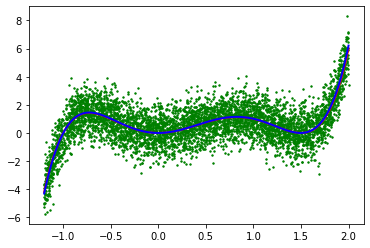

In [14]:
xs = np.linspace(x_lb,x_ub,1000)
plt.plot(xs,mif(xs,p),color='red',linewidth='2.0')
plt.plot(xs,mif(xs,res.x),color='blue',linewidth='2.0')
plt.scatter(x_data,y_data,marker='o',s=2.0,color='green')

Para utilizar otros métodos más potentes necesitamos el gradiente de la función objetivo, la primera función computa la derivada de nuestra función respecto a cada parámetro y la siguietne usa ese resultados para calcular el gradiente de la función objetivo.

In [15]:
def dmif(x,p,i):
    x_1 = p[0]
    x_2 = p[1]
    x_3 = p[2]
    a = p[3]
    if i == 0:
        return -a*(x-x_2)**2*(x-x_3)**2
    elif i == 1:
        return -a*(x-x_1)*2*(x-x_2)*(x-x_3)**2
    elif i == 2:
        return -a*(x-x_1)*(x-x_2)**2*2*(x-x_3)
    elif i == 3:
        return (x-x_1)*(x-x_2)**2*(x-x_3)**2

In [16]:
def dobjective(params):
    dobjective = [0.0,0.0,0.0,0.0]
    for i in range(0,N):
        dobjective[0] += 2*(mif(x_data[i],params) - y_data[i])*dmif(x_data[i],params,0)
        dobjective[1] += 2*(mif(x_data[i],params) - y_data[i])*dmif(x_data[i],params,1)
        dobjective[2] += 2*(mif(x_data[i],params) - y_data[i])*dmif(x_data[i],params,2)
        dobjective[3] += 2*(mif(x_data[i],params) - y_data[i])*dmif(x_data[i],params,3)
    return dobjective

Utilicemos el método de gradientes conjugados (notar que ahora pasamos el nuevo parámetro `gtol`):

In [17]:
params0 = np.array([-0.9,2.3,1.2,2.5])
res = opt.minimize(objective, params0, method='CG', jac=dobjective
                   ,options={'disp': True, 'maxiter' : 1000, 'gtol' : 1e-3})

Optimization terminated successfully.
         Current function value: 4704.919451
         Iterations: 25
         Function evaluations: 55
         Gradient evaluations: 55


In [18]:
res.x

array([-9.98937390e-01,  1.49688162e+00, -1.62466360e-04,  2.04554499e+00])

In [19]:
dobjective(res.x)

[-6.190774149344991e-05,
 0.0003221025451621562,
 -0.0001909913187714274,
 8.532276750058271e-05]

In [20]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array(p)))

Valor inicial =  908229.9822046434
Valor final =  4704.919450786617
Valor con nuestra función =  4712.864786884872


**Preguntas**:

- ¿Cuál método es *mejor*?
- ¿Por qué?